In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving Heart_Disease_Prediction.csv to Heart_Disease_Prediction.csv


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [14]:
df = pd.read_csv('Heart_Disease_Prediction.csv')

In [6]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [7]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [8]:
df.shape

(270, 14)

In [9]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [10]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [12]:
#Preprocessing for standardization
#X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [15]:
dfX=df.drop(['Heart Disease'],axis=1)

In [17]:
#target variable
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [18]:
y= df['Heart Disease']
y

0      Presence
1       Absence
2      Presence
3       Absence
4       Absence
         ...   
265     Absence
266     Absence
267     Absence
268     Absence
269    Presence
Name: Heart Disease, Length: 270, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


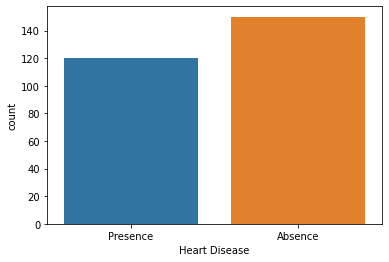

In [20]:
import seaborn
seaborn.countplot(df['Heart Disease'])

In [21]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
test = SelectKBest(score_func= f_classif, k=4)
test.fit(dfX,y)
pd.DataFrame(test.scores_)

,0
0,12.651991
1,26.065252
2,56.554610
3,6.630618
4,3.785661
5,0.071389
6,9.190828
7,56.909111
8,57.169619
9,56.729134


In [22]:
X=df[['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium']]

In [23]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=31)

In [24]:
#Train the model using the training sets
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=31)

In [25]:
pred=knn.predict(X)
pred

array(['Presence', 'Presence', 'Presence', 'Presence', 'Presence',
       'Absence', 'Presence', 'Presence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Presence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Absence', 'Absence', 'Absence',
  

In [26]:
#Predict the response for test dataset
knn.predict(X).shape

(270,)

In [27]:
knn.score(X,y)

0.7074074074074074

In [28]:
#Model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [29]:
accuracy_score(y,pred)

0.7074074074074074

In [30]:
confusion_matrix(y,pred)

array([[120,  30],
       [ 49,  71]])

Text(0.5, 257.44, 'Predicted label')

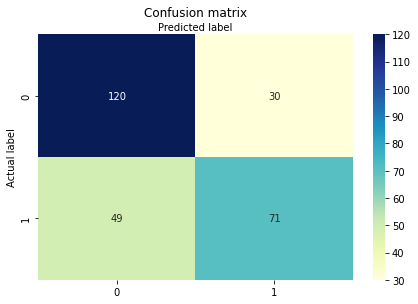

In [31]:
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
seaborn.heatmap(pd.DataFrame(confusion_matrix(y,pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

     Absence       0.71      0.80      0.75       150
    Presence       0.70      0.59      0.64       120

    accuracy                           0.71       270
   macro avg       0.71      0.70      0.70       270
weighted avg       0.71      0.71      0.70       270

